In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
milk = pd.read_csv('/home/hdsingh/Desktop/AI/Tensorflow-Bootcamp-master/04-Recurrent-Neural-Networks/monthly-milk-production.csv',index_col = 'Month')

In [3]:
milk.head()

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0


In [4]:
milk.tail()

,Milk Production
Month,
1975-08-01 01:00:00,858.0
1975-09-01 01:00:00,817.0
1975-10-01 01:00:00,827.0
1975-11-01 01:00:00,797.0
1975-12-01 01:00:00,843.0


In [5]:
milk.index = pd.to_datetime(milk.index)

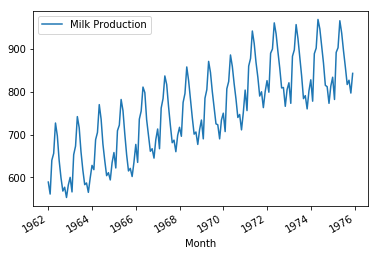

In [6]:
milk.plot();

## Test Train Split

In [7]:
milk.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 01:00:00 to 1975-12-01 01:00:00
Data columns (total 1 columns):
Milk Production    168 non-null float64
dtypes: float64(1)
memory usage: 2.6 KB


In [8]:
train_set = milk.head(156)

In [9]:
test_set = milk.tail(12)

## Scale

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
train_scaled = scaler.fit_transform(train_set)

In [13]:
test_scaled = scaler.fit_transform(test_set)

## Batch Function

In [14]:
def next_batch(training_data,batch_size,steps):
    
    rand_start = np.random.randint(0,len(training_data)-steps)
    y_batch = np.array(training_data[rand_start:rand_start + steps + 1]).reshape(1,steps+1)
    
    return y_batch[:,:-1].reshape(-1,steps,1),y_batch[:,1:].reshape(-1,steps,1)

## Setting up Model

In [15]:
import tensorflow as tf

/home/hdsingh/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Constants

In [16]:
num_inputs = 1
num_time_steps = 12
num_neurons = 100
num_outputs = 1
l_r = 0.03
num_train_iterations = 4000
batch_size = 1

In [17]:
X = tf.placeholder(tf.float32, [None, num_time_steps, num_inputs])
y = tf.placeholder(tf.float32, [None, num_time_steps, num_outputs])

In [18]:
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicLSTMCell(num_units=num_neurons, activation=tf.nn.relu),
    output_size=num_outputs) 

In [19]:
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [20]:
loss = tf.reduce_mean(tf.square(outputs - y)) # MSE
optimizer = tf.train.AdamOptimizer(learning_rate=l_r)
train = optimizer.minimize(loss)

In [21]:
init = tf.global_variables_initializer()

In [22]:
saver = tf.train.Saver()

In [23]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.9)

In [24]:
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
    sess.run(init)
    
    for iteration in range(num_train_iterations):
        
        X_batch, y_batch = next_batch(train_scaled,batch_size,num_time_steps)
        sess.run(train, feed_dict = {X: X_batch, y: y_batch})
        
        if iteration %100 ==0:
            mse = loss.eval(feed_dict={X:X_batch, y:y_batch})
            print(iteration, '\tMSE:',mse)
    
    saver.save(sess,'./milk/model2')

0 	MSE: 0.15176544
100 	MSE: 0.020812199
200 	MSE: 0.012234911
300 	MSE: 0.008632034
400 	MSE: 0.010011038
500 	MSE: 0.0127203455
600 	MSE: 0.013202374
700 	MSE: 0.009634544
800 	MSE: 0.005981876
900 	MSE: 0.00864384
1000 	MSE: 0.0069601643
1100 	MSE: 0.009153682
1200 	MSE: 0.0050144396
1300 	MSE: 0.009100155
1400 	MSE: 0.005197607
1500 	MSE: 0.0075955074
1600 	MSE: 0.0043668533
1700 	MSE: 0.007832265
1800 	MSE: 0.0068820664
1900 	MSE: 0.0050095976
2000 	MSE: 0.0064541777
2100 	MSE: 0.005023222
2200 	MSE: 0.0063430895
2300 	MSE: 0.007415351
2400 	MSE: 0.003940066
2500 	MSE: 0.0057079443
2600 	MSE: 0.0058673075
2700 	MSE: 0.005226051
2800 	MSE: 0.0074064527
2900 	MSE: 0.0040499396
3000 	MSE: 0.007867456
3100 	MSE: 0.00712782
3200 	MSE: 0.0044026556
3300 	MSE: 0.0042941207
3400 	MSE: 0.0042431024
3500 	MSE: 0.005462561
3600 	MSE: 0.0044957646
3700 	MSE: 0.0026655707
3800 	MSE: 0.0038786593
3900 	MSE: 0.0064098216


In [25]:
test_set

,Milk Production
Month,
1975-01-01 01:00:00,834.0
1975-02-01 01:00:00,782.0
1975-03-01 01:00:00,892.0
1975-04-01 01:00:00,903.0
1975-05-01 01:00:00,966.0
1975-06-01 01:00:00,937.0
1975-07-01 01:00:00,896.0
1975-08-01 01:00:00,858.0
1975-09-01 01:00:00,817.0


### Generative Session

In [26]:
with tf.Session() as sess:
    saver.restore(sess,"./milk/model2")
    
    train_seed = list(train_scaled[-12:])
    
    for iteration in range(12):
        X_batch = np.array(train_seed[-num_time_steps:]).reshape(1, num_time_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        train_seed.append(y_pred[0, -1, 0])

INFO:tensorflow:Restoring parameters from ./milk/model2


In [27]:
results = scaler.inverse_transform(np.array(train_seed[12:]).reshape(12,1))

In [28]:
results

array([[897.7557 ],
       [901.648  ],
       [930.63464],
       [937.2291 ],
       [967.94293],
       [964.1987 ],
       [957.6086 ],
       [941.55005],
       [925.5354 ],
       [911.04016],
       [900.7742 ],
       [899.5879 ]], dtype=float32)

In [29]:
test_set['Generated'] = results

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
test_set

,Milk Production,Generated
Month,,
1975-01-01 01:00:00,834.0,897.755676
1975-02-01 01:00:00,782.0,901.648010
1975-03-01 01:00:00,892.0,930.634644
1975-04-01 01:00:00,903.0,937.229126
1975-05-01 01:00:00,966.0,967.942932
1975-06-01 01:00:00,937.0,964.198730
1975-07-01 01:00:00,896.0,957.608582
1975-08-01 01:00:00,858.0,941.550049
1975-09-01 01:00:00,817.0,925.535400


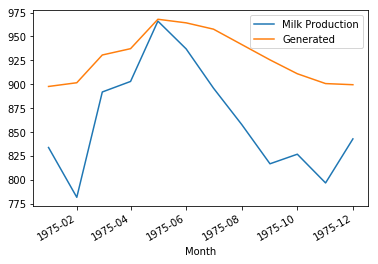

In [31]:
test_set.plot()